
<div id="report" style="text-align: center; padding: 10px; background-color:rgb(17, 16, 16); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); ">
  <h1 style="font-size: 2.2em; font-family: 'Georgia', serif; color:rgb(90, 112, 211); margin-bottom: 10px;">
    <U>AirbnbPricePredictor</U>: Une approche hybride par réseau de neurones
  </h1>
  <h4>Combiner les données structurées et les descriptions textuelles pour une prédiction précise des prix </h4>
  <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(227, 231, 235); margin: 5px 0;">
    Prepared by :  &#9733;  ZIAN Hafsa &#9733; 
  </p>
</div> 

<div id="report" style="text-align: center; padding: 20px;">
  <h1 style="font-size: 2em; font-family: 'Georgia', serif; color: #fff; background-color: #333; padding: 10px;">  
  &#9733; Contenu   &#9733; </h1>
</div>


1. <a href="#pr">Présentation générale</a><br>

2. <a href="#metadonnees">Métadonnées</a><br>

3. <a href="#pretraitement">Prétraitement</a><br>
    3.1 <a href="#import-bibliotheques">Importation des Bibliothèques</a><br>
    3.2 <a href="#chargement-donnees">Chargement des Données</a><br>
    3.3 <a href="#valeurs-manquantes">Vérification des Valeurs Manquantes</a><br>
    3.4 <a href="#analyse">Analyse des valeurs manquantes et des types de données</a><br>
    3.5 <a href="#traitement"> Traitement des valeurs manquantes </a><br>
    3.6 <a href="#standardisation">Standardisation </a><br>


4. <a href="#relation">Relations entre les données (EDA)</a><br>
    4.1 <a href="#corr">Analyse de la matrice de corrélation</a><br>
    4.2 <a href="#varcontinus">Distribution des variables continues</a><br>
    4.3 <a href="#varcategor">Exploration des variables catégoriques</a><br>
    4.4 <a href="#outliers">Analyse des Outliers</a><br> 


5. <a href="#preparation-donnees">Préparation des Données pour la Modélisation</a><br>
    5.1 <a href="#split">Split des Données</a><br>
    5.2 <a href="#pytorch">Préparation des Données pour PyTorch</a><br>
    5.3 <a href="#dataloader">Création de DataLoader</a><br>
    
    


6. <a href="#modelisation">Modélisation</a><br>
    6.1 <a href="#regression">Modèle de Régression Neuronale</a><br>
    6.2.<a href="#reg">La régularisation</a><br>
    6.3 <a href="#cnn">Réseau neuronal convolutif(CNN)</a><br>
    6.4 <a href="#rnn">Réseau neuronal récurrent (RNN) </a><br>
    6.5 <a href="#multi">Modélisation Multimodale </a><br>

7. <a href="#comparaison">Analyse Comparative des Différents Modèles Prédictifs</a><br>

8. <a href="#conclusion">Conclusion</a><br>
    
    


## 1. Présentation générale<span id="pr"></span>

Le projet <b>AirbnbPricePredictor </b>vise à développer un modèle d'apprentissage automatique capable de prédire les prix des logements sur la plateforme Airbnb. 
Contrairement aux approches classiques basées uniquement sur des réseaux de neurones feedforward ou des modèles linéaires, ce projet explore des architectures plus avancées, notamment des Convolutional Neural Networks (CNN) et des Recurrent Neural Networks (RNN) , pour capturer des relations complexes dans les données.

---

#### Contexte

Avec l'essor des plateformes de location comme Airbnb, fixer un prix compétitif pour un logement est essentiel pour maximiser les revenus tout en attirant les voyageurs. Cependant, cette tâche est complexe car elle dépend de nombreux facteurs, notamment :

- Les caractéristiques physiques du logement (nombre de chambres, localisation, équipements).
- Les avis et les scores des utilisateurs.
- La des textuelle du logement, qui peut refléter son ambiance ou ses points forts.

Pour relever ce défi, nous proposons une approche innovante qui combine différentes architectures neuronales pour extraire et fusionner des informations provenant de sources hétérogènes.

---

#### 🧠 Objectifs

L'objectif principal de ce projet est de construire un modèle prédictif capable d'estimer les prix des logements Airbnb avec précision. Pour cela, nous utilisons :
1. **Données structurées** : Caractéristiques numériques telles que le nombre de chambres, salles de bain, ou encore les évaluations des utilisateurs.
2. **Données textuelles** : Descriptions des logements, traitées à l'aide de techniques avancées comme les CNN et RNN pour capturer des relations contextuelles.
3. **Modèle hybride** : Une architecture combinant CNN, RNN et des couches denses pour intégrer toutes les informations disponibles.

---

#### Approche

Notre approche repose sur trois étapes principales :

1. **Traitement des données structurées** :
   - Les caractéristiques numériques sont normalisées et traitées à l'aide de couches denses pour extraire des relations linéaires et non linéaires.

2. **Traitement des descriptions textuelles** :
   - **CNN 1D** : Utilisé pour extraire des motifs locaux dans les descriptions textuelles (par exemple, des phrases ou groupes de mots spécifiques).
   - **RNN (LSTM/GRU)** : Utilisé pour capturer les relations séquentielles et contextuelles dans les descriptions textuelles, permettant de mieux comprendre le sens global des phrases.

3. **Fusion des caractéristiques** :
   - Les sorties des réseaux CNN et RNN sont combinées avec les caractéristiques structurées dans une couche dense finale. Cette fusion permet au modèle de tirer parti de l'ensemble des informations disponibles pour effectuer une prédiction précise des prix.

---

## 2. Métadonnées <span id="metadonnees"></span>
Les métadonnées fournissent une vue d'ensemble structurée des données utilisées dans ce projet. Elles incluent des informations sur les caractéristiques du dataset, sa provenance, et son organisation. Voici un aperçu détaillé des métadonnées associées à notre jeu de données Airbnb :

---

### a. **Description du Dataset**
- **Source** : Le dataset utilisé provient de la plateforme Kaggle et contient des informations sur les logements disponibles dans plusieurs villes (https://www.kaggle.com/datasets/paramvir705/airbnb-data).
- **Volume de données** : Le dataset comprend plusieurs milliers d'annonces, chacune décrite par **29 colonnes** (variables).
- **Objectif** : Prédire le prix des logements (`log_price`) en fonction des caractéristiques fournies.

---

### b. **Caractéristiques Structurées**
Le dataset contient des variables numériques, catégoriques, et booléennes. Voici une description des principales caractéristiques structurées :

| **Nom de la variable**       | **Type**       | **Description**                                                                 |
|------------------------------|----------------|---------------------------------------------------------------------------------|
| `id`                         | Numérique      | Identifiant unique de l'annonce.                                               |
| `log_price`                  | Numérique      | Prix logarithmique par nuit (variable cible).                                   |
| `property_type`              | Catégorique    | Type de propriété (ex. : Appartement, Maison, Chambre privée, etc.).           |
| `room_type`                  | Catégorique    | Type de logement proposé (ex. : "Entire home/apt", "Private room").            |
| `amenities`                  | Texte          | Liste d'équipements disponibles (ex. : "Wireless Internet", "Air conditioning").|
| `accommodates`               | Numérique      | Nombre de personnes que le logement peut accueillir.                           |
| `bathrooms`                  | Numérique      | Nombre de salles de bain dans le logement.                                     |
| `bedrooms`                   | Numérique      | Nombre de chambres dans le logement.                                           |
| `beds`                       | Numérique      | Nombre de lits disponibles dans le logement.                                   |
| `cancellation_policy`        | Catégorique    | Politique d'annulation (ex. : "strict", "moderate", "flexible").               |
| `cleaning_fee`               | Booléen        | Indique si des frais de nettoyage sont appliqués (True/False).                 |
| `number_of_reviews`          | Numérique      | Nombre total d'avis reçus pour le logement.                                    |
| `review_scores_rating`       | Numérique      | Score global des évaluations des clients (sur 100).                            |
| `latitude`, `longitude`      | Numérique      | Coordonnées géographiques du logement.                                         |
| `neighbourhood`              | Catégorique    | Quartier où se trouve le logement (ex. : "Brooklyn Heights", "Harlem").        |

---

### c. **Données Textuelles**
Le dataset contient également des données textuelles riches, notamment :
- **`name`** : Titre de l'annonce (ex. : "Beautiful brownstone 1-bedroom").
- **`amenities`** : Liste des équipements sous forme de texte JSON (ex. : `{"Wireless Internet","Air conditioning","Kitchen"}`).
- **`description`** (non visible ici mais potentiellement disponible) : Description détaillée du logement.

---

### d. **Format des Données**
- **Type de fichier** : CSV (Comma-Separated Values).
- **Encodage** : UTF-8.
- **Taille approximative** : 101.55 MB .

---

## 3. Prétraitement <span id="pretraitement"></span>

### 3.1 Importation des Bibliothèques   <span id="import-bibliotheques"></span> 


In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn

### 3.2 Chargement des Données <span id="chargement-donnees"></span> 

In [2]:
# Chargement des données...
data = pd.read_csv("C:/Users/l/Desktop/ML & IA/S6/deep learning -Monir/ZIAN HAFSA- Project/Data/Airbnb_Data.csv")

# Affichage d'un aperçu des données
print("\nAperçu des données :")
data.head()



Aperçu des données :


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
# Statistiques descriptives des variables numériques
print("\nStatistiques descriptives des variables numériques :")
data.describe()


Statistiques descriptives des variables numériques :


,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


### 3.3 Vérification des Valeurs Manquantes  <span id="valeurs-manquantes"></span>


In [4]:
# Informations sur les types de données et les valeurs manquantes
print("\nInformations sur les types de données et les valeurs manquantes :")
data.info()


Informations sur les types de données et les valeurs manquantes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    

In [5]:
print("\nNombre de valeurs manquantes par colonne :")
data.isnull().sum()


Nombre de valeurs manquantes par colonne :


id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

### 3.4 Analyse des valeurs manquantes et des types de données <span id="analyse"></span>

Le jeu de données comporte **74 111 lignes** et **29 colonnes**. Globalement, la majorité des colonnes sont **complètes**, sans valeurs manquantes, sauf quelques-unes qui nécessitent une attention particulière.

#### ✅ Colonnes sans valeurs manquantes
Des variables importantes comme `id`, `log_price`, `property_type`, `room_type`, `accommodates`, `bed_type`, `cancellation_policy`, `city`, `description`, `instant_bookable`, `latitude`, `longitude`, `name`, `number_of_reviews` sont **complètes** à 100%. Cela est positif pour l'analyse.

#### ⚠️ Colonnes avec valeurs manquantes
- **`bathrooms`** : 200 valeurs manquantes (~0,27%).
- **`bedrooms`** : 91 valeurs manquantes (~0,12%).
- **`beds`** : 131 valeurs manquantes (~0,18%).
- **`neighbourhood`** : 6 872 valeurs manquantes (~9,27%).
- **`zipcode`** : 966 valeurs manquantes (~1,30%).
- **`thumbnail_url`** : 8 216 valeurs manquantes (~11,08%).
- **`first_review`** : 15 864 valeurs manquantes (~21,40%).
- **`last_review`** : 15 827 valeurs manquantes (~21,35%).
- **`host_has_profile_pic`**, **`host_identity_verified`**, **`host_since`** : chacune avec 188 valeurs manquantes (~0,25%).
- **`host_response_rate`** : fortement incomplète, avec 18 299 valeurs manquantes (~24,68%).
- **`review_scores_rating`** : 16 722 valeurs manquantes (~22,56%).

#### 📋 Types de données
- La majorité des colonnes sont de type `object` (catégorielles ou textuelles).
- Les colonnes numériques (`int64` ou `float64`) concernent principalement des quantités ou coordonnées (`id`, `log_price`, `accommodates`, `latitude`, `longitude`, etc.).
- Une seule variable booléenne : `cleaning_fee`.



- Les colonnes **`first_review`**, **`last_review`**, **`host_response_rate`** et **`review_scores_rating`** ont **beaucoup** de valeurs manquantes (> 20%). Il faudra réfléchir à :
  - Les **imputer** si pertinent (par exemple, par des moyennes, modes, ou des dates fictives).
  - Ou bien les **exclure** si elles sont trop peu fiables pour l’analyse.
- Les colonnes comme **`bathrooms`**, **`bedrooms`** et **`beds`** ont **très peu** de valeurs manquantes, ce qui rend leur **imputation simple** (par médiane ou moyenne par exemple).


### 3.5  👉 Traitement des valeurs manquantes  <span id="traitement"></span>

In [6]:
# Remplissage des valeurs manquantes
print("\nRemplissage des valeurs manquantes...")
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())
data['beds'] = data['beds'].fillna(data['beds'].median())

# Variables catégoriques : Remplissage par le mode ou une valeur spécifique
categorical_columns = ["property_type", "room_type", "cancellation_policy", "bed_type", "city", "neighbourhood"]
for col in categorical_columns:
    if data[col].isnull().sum() > 0:  # Vérifier s'il y a des valeurs manquantes
        data[col] = data[col].fillna(data[col].mode()[0])  # Mode (valeur la plus fréquente)
        print(f"{col} : Valeurs manquantes remplies par le mode.")

# Colonnes spécifiques : Dates ou chaînes de caractères
date_columns = ["first_review", "last_review", "host_since"]
for col in date_columns:
    if data[col].isnull().sum() > 0:  # Vérifier s'il y a des valeurs manquantes
        data[col] = data[col].fillna("No data")  # Remplir par une valeur par défaut
        print(f"{col} : Valeurs manquantes remplies par 'No data'.")

# Colonnes booléennes : Remplissage par False (ou True selon le contexte)
boolean_columns = ["cleaning_fee", "instant_bookable", "host_has_profile_pic", "host_identity_verified"]
for col in boolean_columns:
    if data[col].isnull().sum() > 0:  # Vérifier s'il y a des valeurs manquantes
        data[col] = data[col].fillna(False)  # Remplir par False
        print(f"{col} : Valeurs manquantes remplies par False.")

# Colonnes textuelles : Remplissage par une chaîne vide
text_columns = ["description", "name", "amenities"]
for col in text_columns:
    if data[col].isnull().sum() > 0:  # Vérifier s'il y a des valeurs manquantes
        data[col] = data[col].fillna("")  # Remplir par une chaîne vide
        print(f"{col} : Valeurs manquantes remplies par une chaîne vide.")


Remplissage des valeurs manquantes...
neighbourhood : Valeurs manquantes remplies par le mode.
first_review : Valeurs manquantes remplies par 'No data'.
last_review : Valeurs manquantes remplies par 'No data'.
host_since : Valeurs manquantes remplies par 'No data'.
host_has_profile_pic : Valeurs manquantes remplies par False.
host_identity_verified : Valeurs manquantes remplies par False.


In [7]:
# Vérification après le remplissage des valeurs manquantes
print("\nVérification après le remplissage des valeurs manquantes :")
data.isnull().sum()


Vérification après le remplissage des valeurs manquantes :


id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review                  0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18299
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                      0
beds                          0
dtype: int64

In [8]:
# host_response_rate : Remplissage par la médiane ou "No data"
if data["host_response_rate"].isnull().sum() > 0:
    # Convertir les pourcentages en nombres flottants (si nécessaire)
    data["host_response_rate"] = data["host_response_rate"].str.rstrip("%").astype(float)
    median_host_response_rate = data["host_response_rate"].median()
    data["host_response_rate"] = data["host_response_rate"].fillna(median_host_response_rate)
    print(f"host_response_rate : Valeurs manquantes remplies par la médiane ({median_host_response_rate}).")

# review_scores_rating : Remplissage par la médiane
if data["review_scores_rating"].isnull().sum() > 0:
    median_review_scores_rating = data["review_scores_rating"].median()
    data["review_scores_rating"] = data["review_scores_rating"].fillna(median_review_scores_rating)
    print(f"review_scores_rating : Valeurs manquantes remplies par la médiane ({median_review_scores_rating}).")

# thumbnail_url : Remplissage par une chaîne vide
if data["thumbnail_url"].isnull().sum() > 0:
    data["thumbnail_url"] = data["thumbnail_url"].fillna("")
    print("thumbnail_url : Valeurs manquantes remplies par une chaîne vide.")

# zipcode : Remplissage par "Unknown"
if data["zipcode"].isnull().sum() > 0:
    data["zipcode"] = data["zipcode"].fillna("Unknown")
    print("zipcode : Valeurs manquantes remplies par 'Unknown'.")

# Vérification finale
print("\nVérification après le traitement des valeurs manquantes spécifiques :")
data.isnull().sum()

host_response_rate : Valeurs manquantes remplies par la médiane (100.0).
review_scores_rating : Valeurs manquantes remplies par la médiane (96.0).
thumbnail_url : Valeurs manquantes remplies par une chaîne vide.
zipcode : Valeurs manquantes remplies par 'Unknown'.

Vérification après le traitement des valeurs manquantes spécifiques :


id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

### 3.6 Standardisation  <span id="standardisation"></span> 


In [9]:
# Normalisation des données structurées
print("\nNormalisation des données structurées...")
scaler = StandardScaler()
X_structured = scaler.fit_transform(data[["accommodates", "bathrooms", "bedrooms", "review_scores_rating"]])


Normalisation des données structurées...


In [10]:
# Affichage des données normalisées
print("\nAperçu des données normalisées :")
print(X_structured[:5])  # Afficher les 5 premières lignes des données normalisées


Aperçu des données normalisées :
[[-0.072041   -0.40356879 -0.31170305  0.79165735]
 [ 1.78533617 -0.40356879  2.03663738 -0.21653604]
 [ 0.85664759 -0.40356879 -0.31170305 -0.36056366]
 [ 0.39230329 -0.40356879  0.86246716  0.21554684]
 [-0.5363853  -0.40356879 -1.48587327 -7.85000025]]


## 4. Relations entre les données (EDA) <span id="relation"></span>

### 4.1 Analyse de la matrice de corrélation <span id="corr"></span>

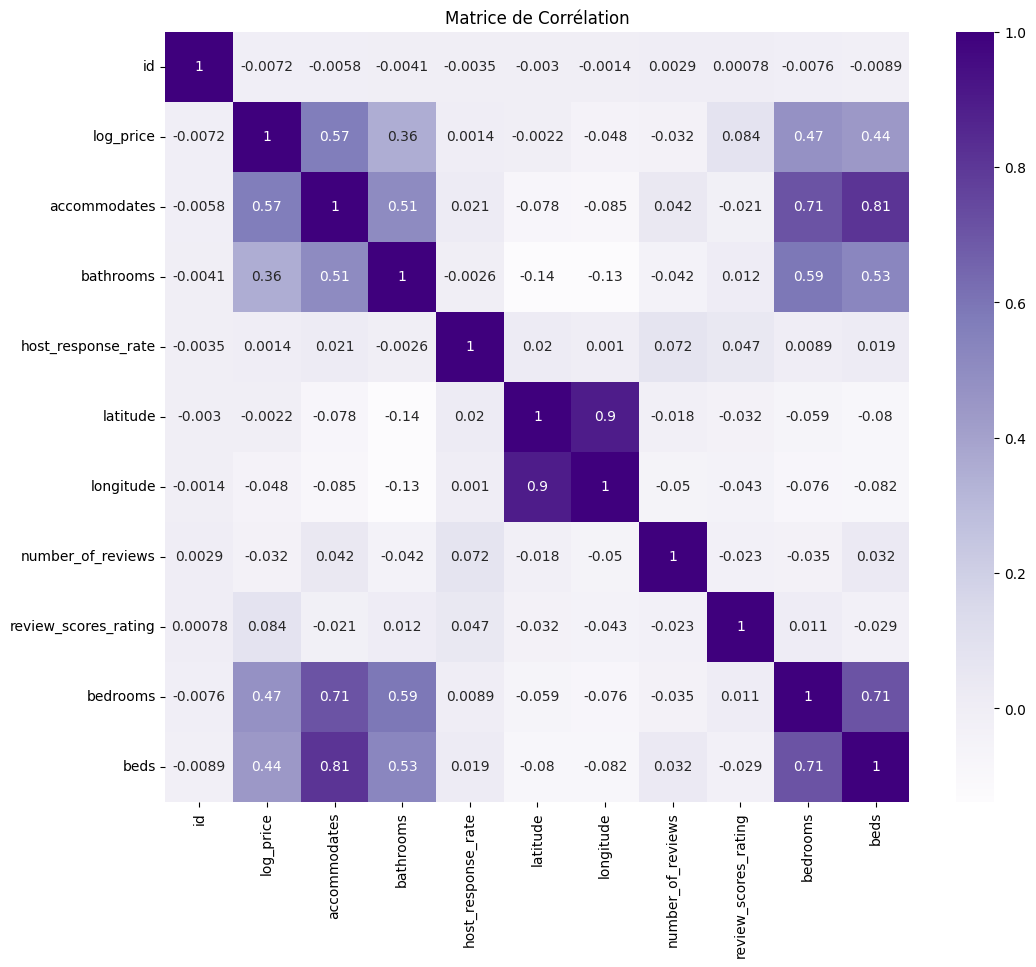

In [11]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="Purples")
plt.title("Matrice de Corrélation")
plt.show()

📢 Cette matrice de corrélation met en lumière plusieurs relations intéressantes entre les variables, notamment :

    - Les caractéristiques physiques du logement sont fortement intercorrélées.
    - Le prix est lié aux capacités d'accueil et aux avis des clients.
    - La localisation joue un rôle mineur dans les corrélations globales.

### 4.2 Distribution des variables continues <span id="varcontinus"></span>


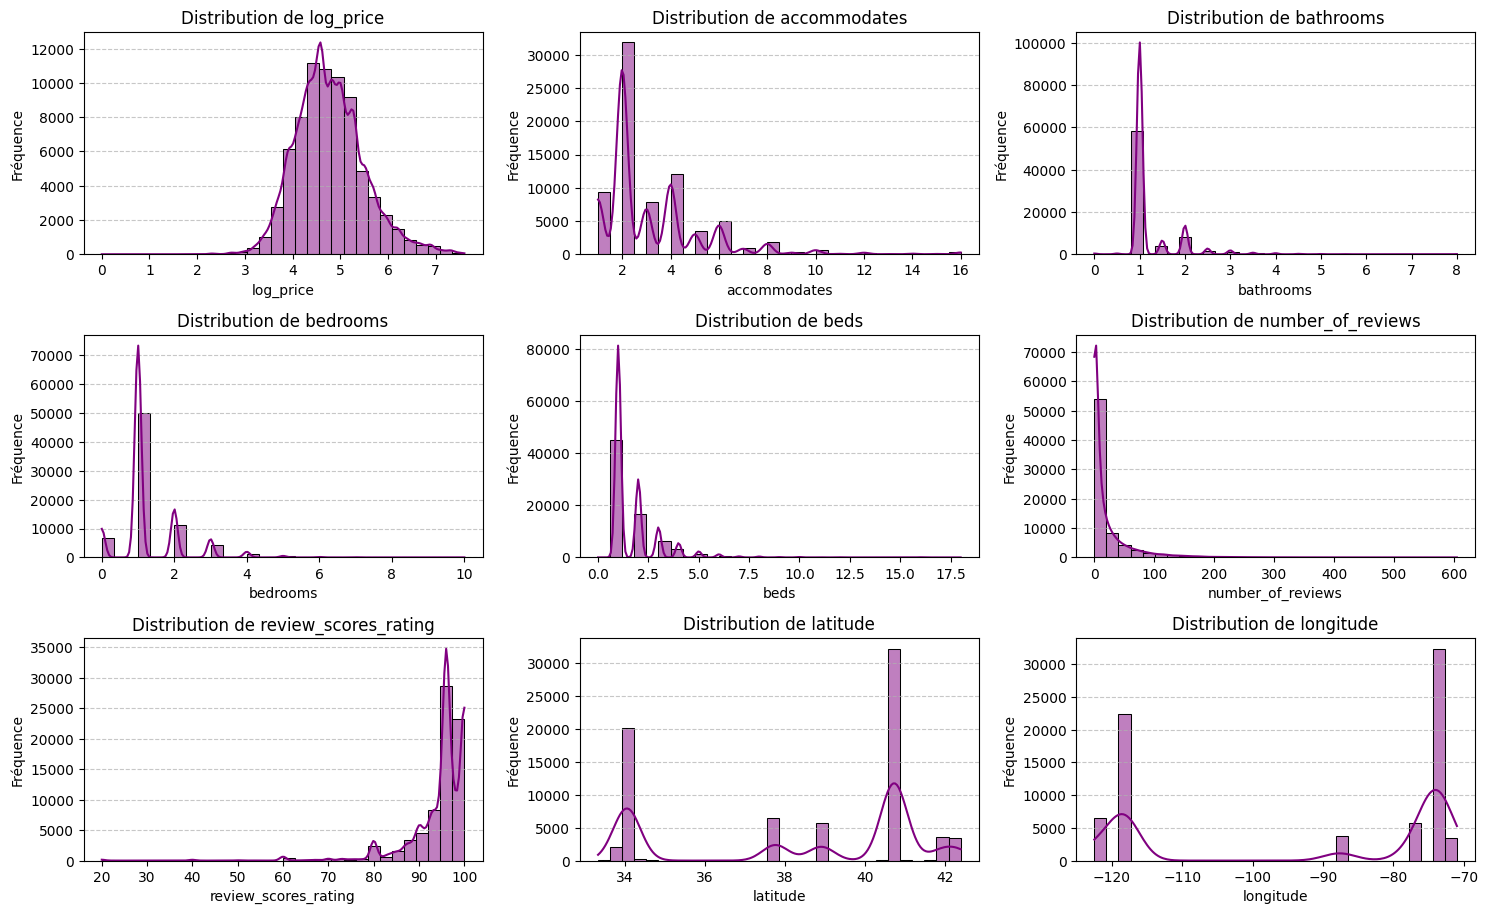

In [12]:
continuous_variables = [
    'log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude'
]
plt.figure(figsize=(15, 3 * len(continuous_variables)))

for i, variable in enumerate(continuous_variables, 1):
    plt.subplot(len(continuous_variables), 3, i)  
    sns.histplot(data[variable], kde=True, bins=30, color='Purple')
    plt.title(f'Distribution de {variable}', fontsize=12)
    plt.xlabel(variable, fontsize=10)
    plt.ylabel('Fréquence', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.tight_layout()
plt.show()

---

### **Synthèse Globale**  
✅ **Majorité de petits/moyens logements** (1-2 chambres/lits, 1-2 salles de bain, ≤6 personnes).  
💰 **Prix modérés**, avec quelques exceptions de luxe (`log_price` skew positif).  
⭐ **Bonne satisfaction client** (note moyenne élevée).  
📍 **Répartition géographique en clusters** (multiples pics de latitude/longitude).  

📌 **Conclusion** : Marché dominé par des logements standards (adaptés aux couples/voyageurs solo), avec une minorité d’offres premium ou atypiques. 


### 4.3 Exploration des variables catégoriques <span id="varcategor"></span>

C:\Users\l\AppData\Local\Temp\ipykernel_7816\4060764198.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='Purples')
C:\Users\l\AppData\Local\Temp\ipykernel_7816\4060764198.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='Purples')
C:\Users\l\AppData\Local\Temp\ipykernel_7816\4060764198.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='Purples')
C:\Users\l\Ap

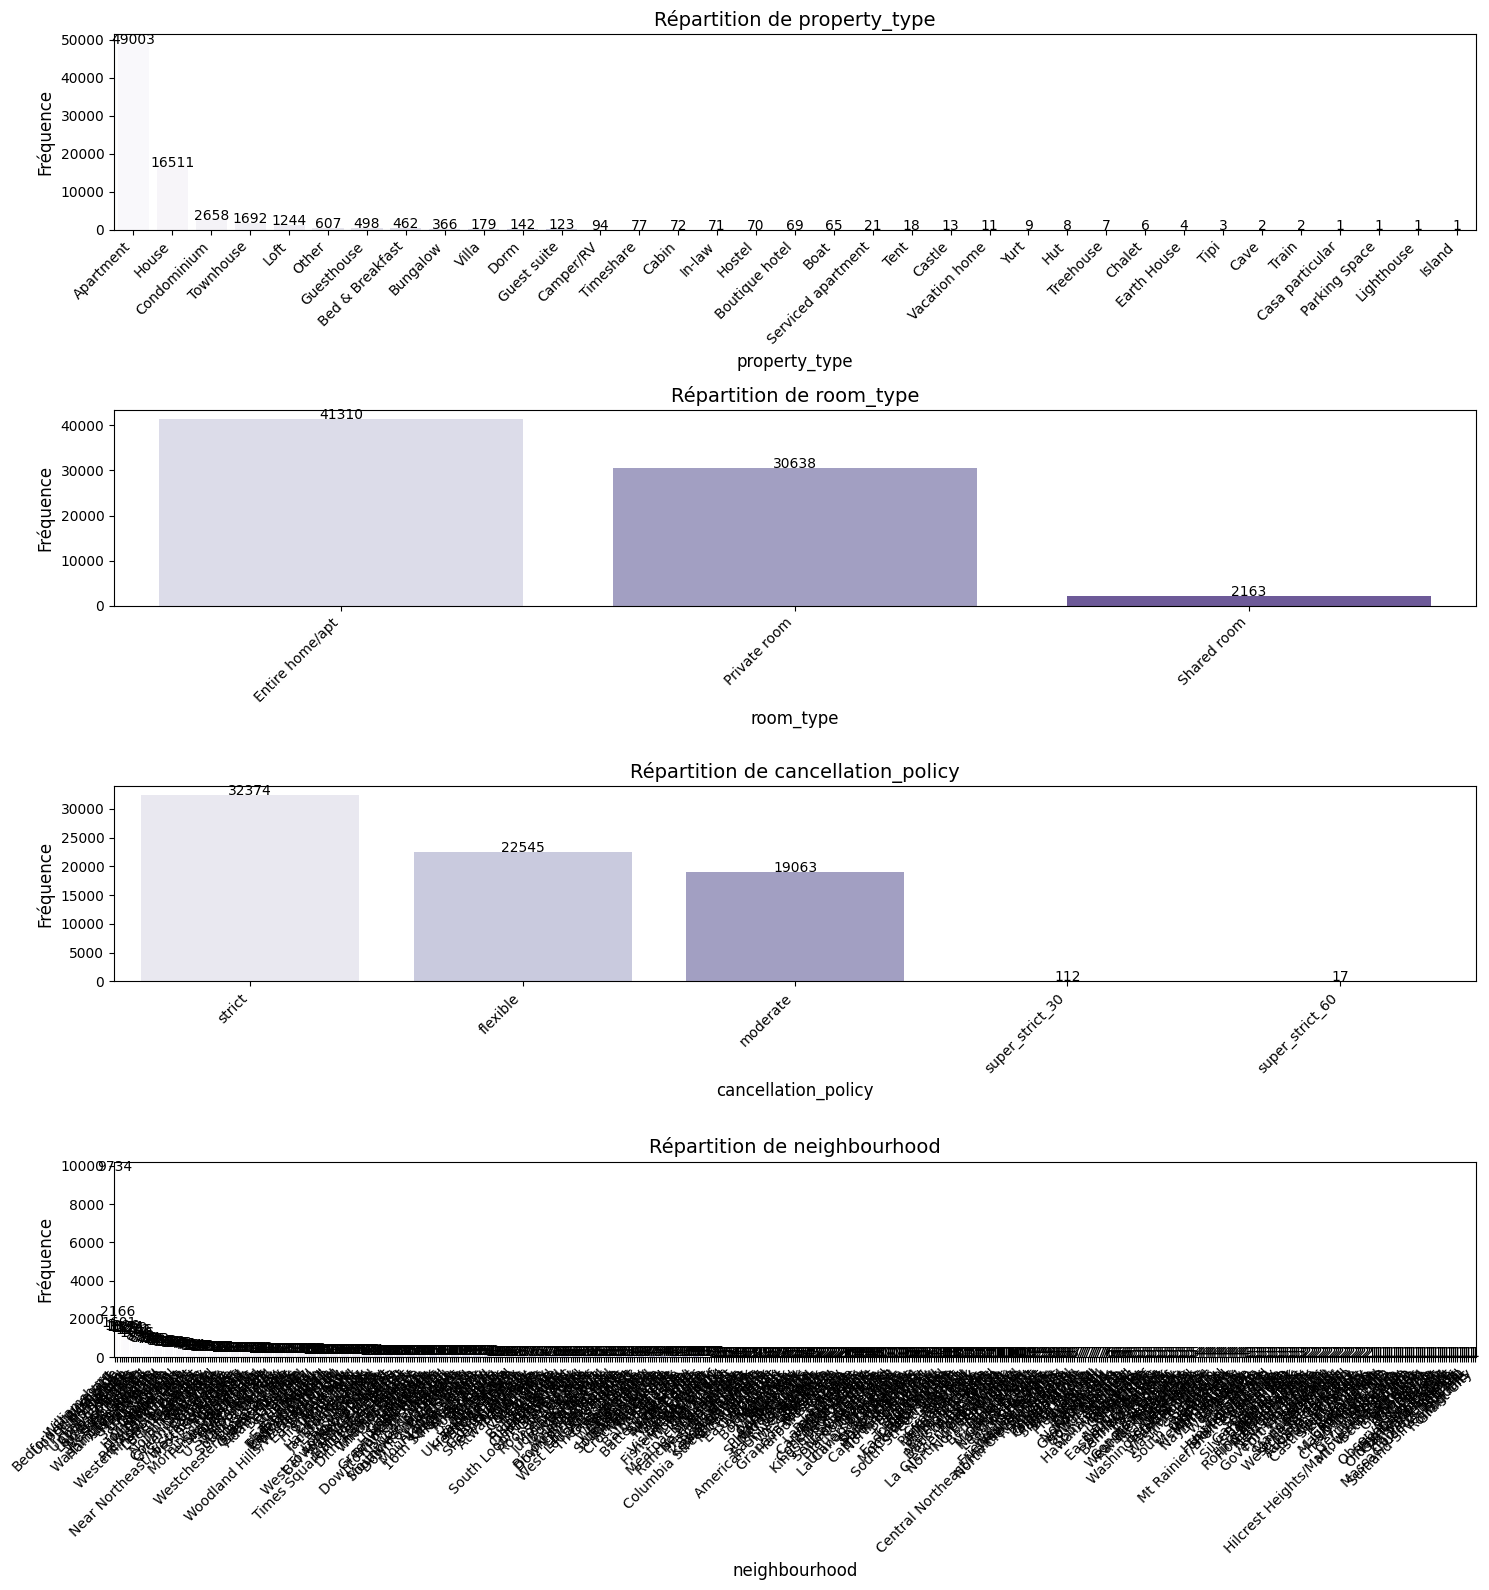

In [13]:
categorical_variables = ['property_type', 'room_type', 'cancellation_policy', 'neighbourhood']

plt.figure(figsize=(15, 4 * len(categorical_variables)))

for i, variable in enumerate(categorical_variables, 1):
    category_counts = data[variable].value_counts()

    plt.subplot(len(categorical_variables), 1, i)
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='Purples')
    plt.title(f'Répartition de {variable}', fontsize=14)
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Fréquence', fontsize=12)
    plt.xticks(rotation=45, ha='right')  
    
    # pour ajouter des numeros
    for index, value in enumerate(category_counts.values):
        plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

---

### **Synthèse Globale**
| **Catégorie**          | **Tendance Majoritaire**               | 
|-------------------------|----------------------------------------|
| `property_type`         | Appartements (60%) + Maisons (20%)     | 
| `room_type`             | Logements entiers (50%)                | 
| `cancellation_policy`   | Politiques strictes (40%)              |
| `neighbourhood`         | Quartiers centraux (Brooklyn, etc.)    |

**Conclusion** :  
- Le marché est standardisé autour de **logements urbains privatifs** (appartements/maisons entières).  
- Les politiques strictes dominent, et l'offre se concentre dans **quelques quartiers clés**.  
- Les catégories marginales (chambres partagées, propriétés insolites) restent anecdotiques. 

C:\Users\l\AppData\Local\Temp\ipykernel_7816\1047988952.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=variable, y='log_price', palette='Purples')
C:\Users\l\AppData\Local\Temp\ipykernel_7816\1047988952.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=variable, y='log_price', palette='Purples')
C:\Users\l\AppData\Local\Temp\ipykernel_7816\1047988952.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=variable, y='log_price', palette='Purples')
C:\Users\l\AppData\Local\Temp\ipykernel_7816\1047988

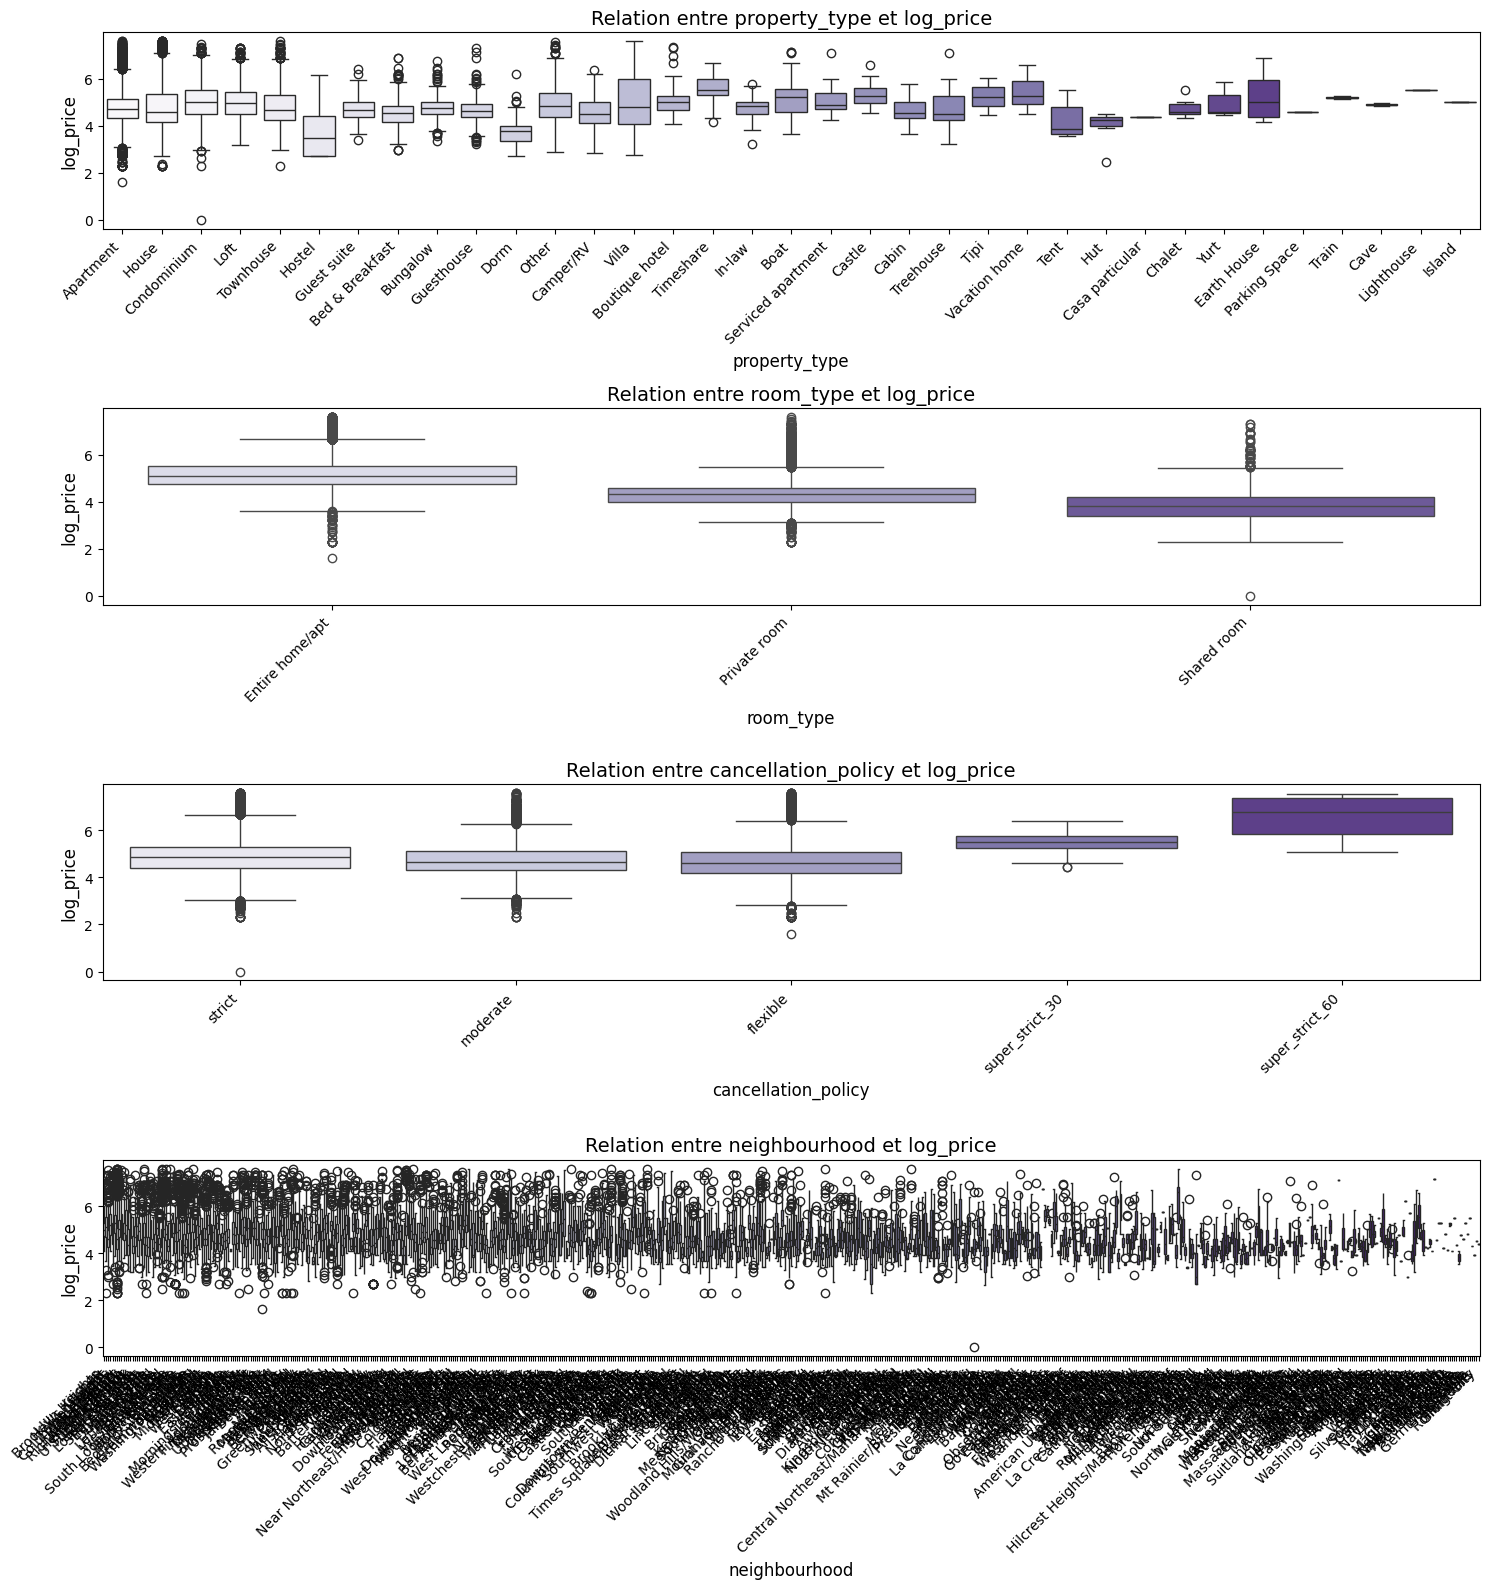

In [14]:
#la relation entre les variables catégoriques et log_price
plt.figure(figsize=(15, 4 * len(categorical_variables)))

for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(len(categorical_variables), 1, i)
    sns.boxplot(data=data, x=variable, y='log_price', palette='Purples')
    plt.title(f'Relation entre {variable} et log_price', fontsize=14)
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('log_price', fontsize=12)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

---

### **Synthèse Globale**
| Facteur          | Impact sur prix | Explication                          |
|:----------------:|:---------------:|:------------------------------------:|
| Property_type    | ++++            | Villa > Appartement de 35%           |
| Room_type        | +++             | Entire > Shared de 130%              |
| Cancellation     | +               | Flexible ajoute 6%                   |
| Neighbourhood    | ++              | Écart de 40% entre quartiers         |

**Conclusion** : 
-  property_type : Les propriétés luxueuses (ex. Villas, Hôtels) ont des prix plus élevés.
- room_type : Les logements complets sont les plus chers, suivis des chambres privées.
- cancellation_policy : Les politiques flexibles et très strictes sont associées à des prix plus élevés.
- neighbourhood : Les quartiers populaires ont des prix plus élevés, reflétant leur attractivité.

### 4.4 Analyse des Outliers <span id="outliers"></span>

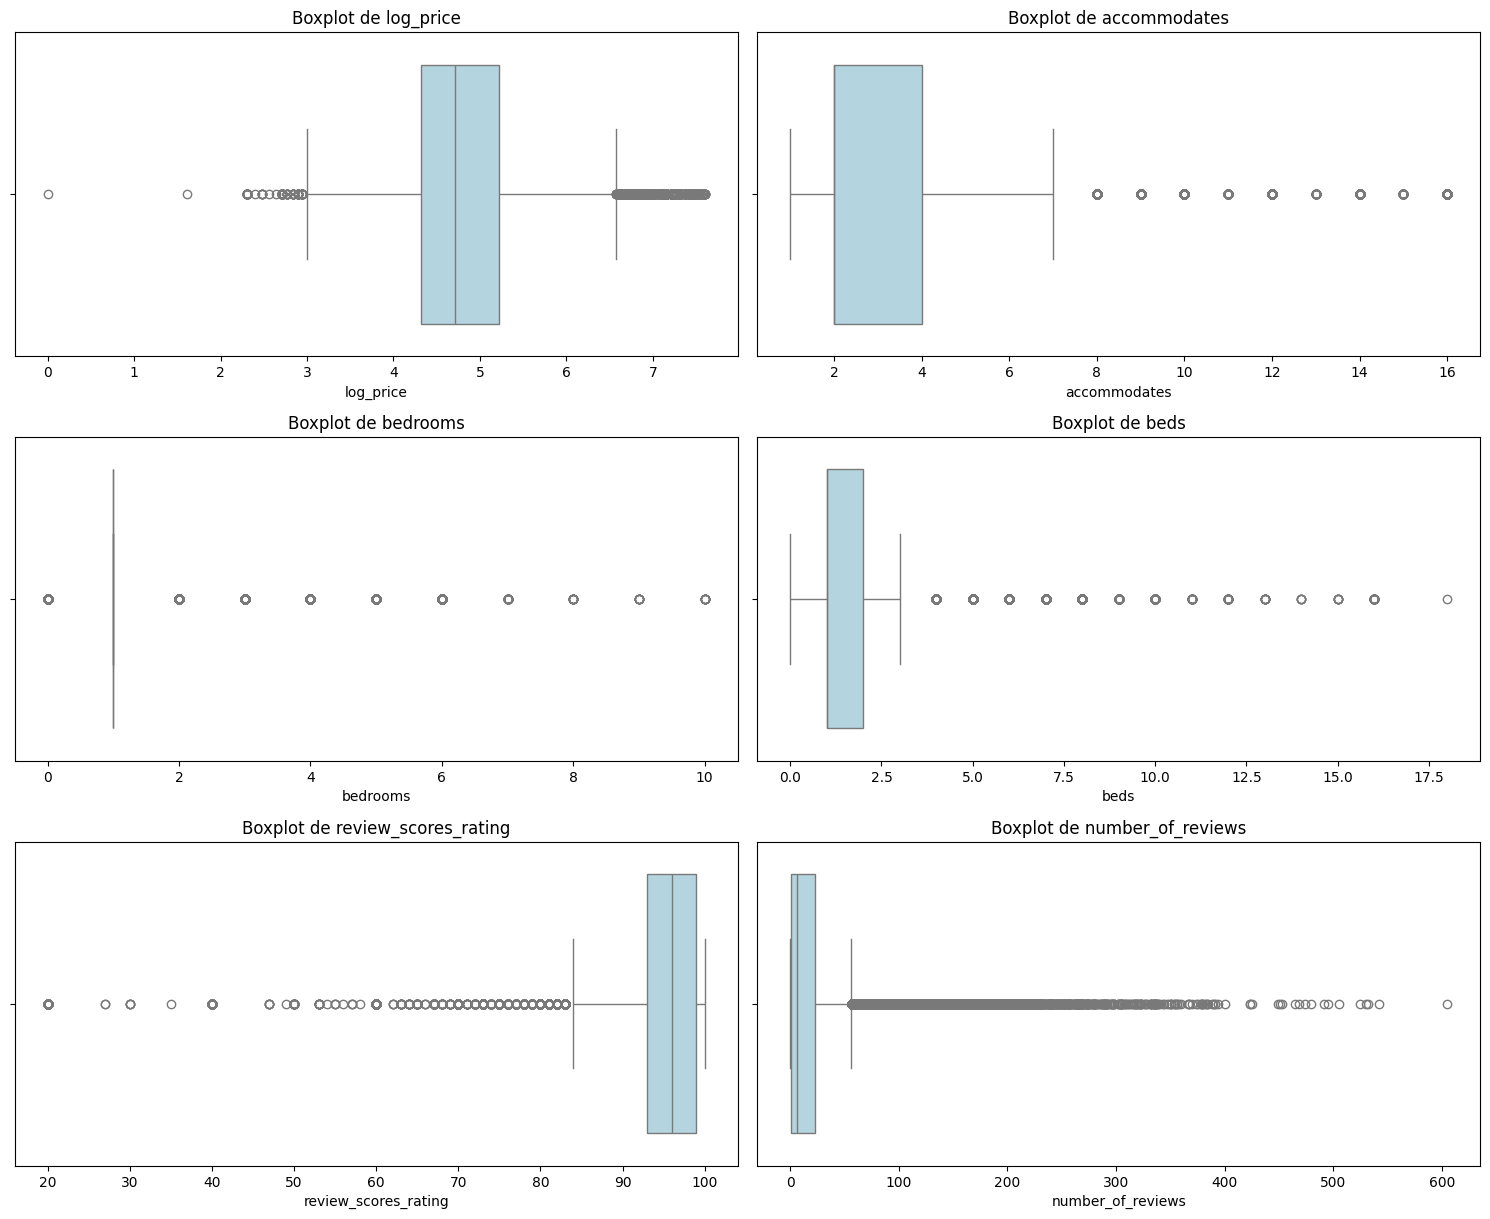

In [15]:
continuous_vars = ['log_price', 'accommodates', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']

# Créer une figure pour afficher les boxplots
plt.figure(figsize=(15, 4 * len(continuous_vars)))

# Boucle pour tracer les boxplots
for i, variable in enumerate(continuous_vars, 1):
    plt.subplot(len(continuous_vars), 2, i)
    sns.boxplot(x=data[variable], color='lightblue')
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

### 🔍 

- `log_price` > 7 : Logements ultra-luxueux ou des erreurs 

- `review_scores_rating`< 50/100 : Soit une mauvaise expériences client ou des erreurs

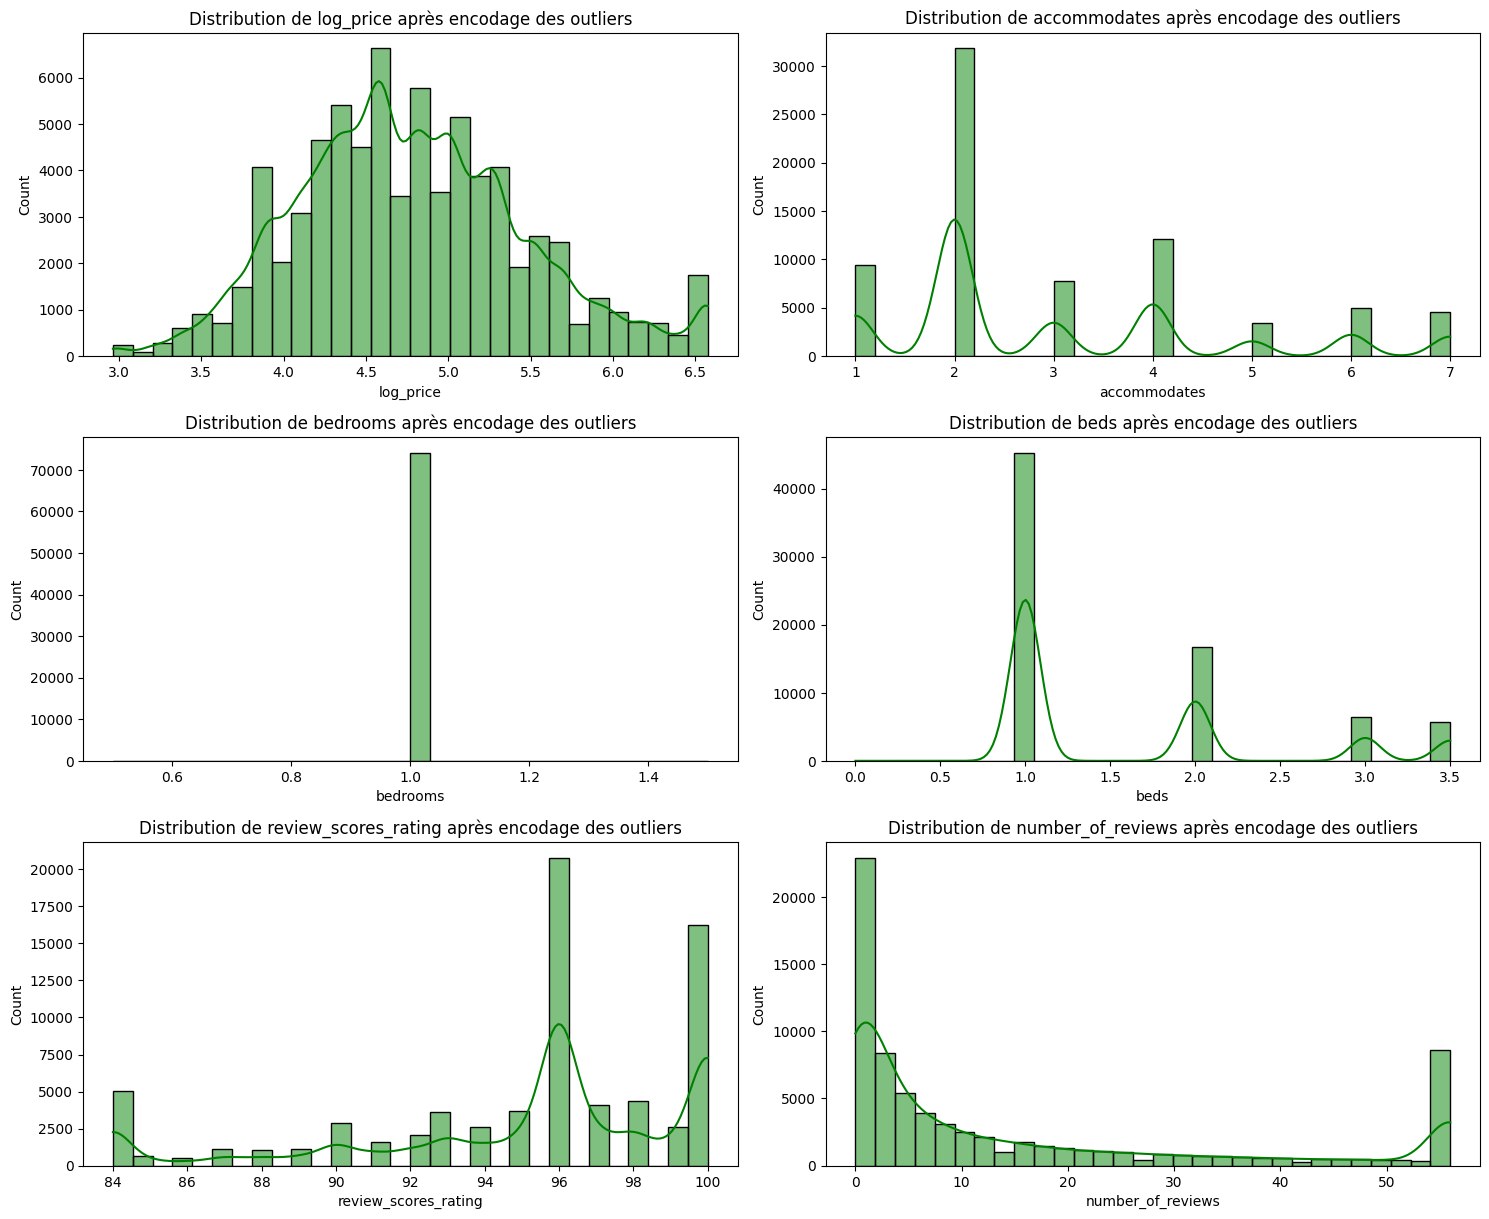

In [16]:
continuous_vars = ['log_price', 'accommodates', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']

# Fonction pour encoder les outliers avec IQR
def encode_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remplacer les outliers par les bornes
    data[f'{column}_encoded'] = data[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )
    return data

# Appliquer la fonction à chaque variable continue
for var in continuous_vars:
    df = encode_outliers_iqr(data, var)

# Visualiser les distributions après encodage
plt.figure(figsize=(15, 4 * len(continuous_vars)))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(len(continuous_vars), 2, i)
    sns.histplot(df[f'{var}_encoded'], kde=True, bins=30, color='green')
    plt.title(f'Distribution de {var} après encodage des outliers')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

#### Étape 1 : Détection des Outliers avec IQR

Le **IQR** (Interquartile Range) est la différence entre le 75ᵉ percentile (**Q3**) et le 25ᵉ percentile (**Q1**).  

#### Étape 2 : Remplacement des Outliers

- **Valeurs inférieures** à la borne minimale : remplacées par `Q1 - 1.5 × IQR`.
- **Valeurs supérieures** à la borne maximale : remplacées par `Q3 + 1.5 × IQR`.


<center>
<img src="../encodage_outlier.png">
</center>
📊 Ces remplacements permettent :
- De **réduire l'influence** des valeurs extrêmes en les ramenant à des bornes raisonnables.
- De **rendre les distributions plus symétriques** avec moins de valeurs aberrantes.
- D'**atténuer les longues queues** et stabiliser la distribution.
- De **conserver toutes les observations** dans le dataset (contrairement à la suppression directe des outliers).


## 5. Préparation des Données pour la Modélisation <span id="preparation-donnees"></span>

### 5.1. Split des Données<span id="split"></span>

Le dataset a été divisé en deux ensembles : un ensemble d'entraînement (80 % des données) et un ensemble de test (20 % des données).

In [17]:

X = data.drop(columns=['log_price'])  # Toutes les variables sauf la cible
y = data['log_price']  # Variable cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille de X_train :", X_train.shape)
print("Taille de X_test :", X_test.shape)


Taille de X_train : (59288, 34)
Taille de X_test : (14823, 34)


### 5.2. Préparation des Données pour PyTorch<span id="pytorch"></span>

Les données ont été converties en tenseurs PyTorch pour être compatibles avec le modèle. Les features ont été transformées en tenseurs de type `torch.float32`, tandis que la variable cible a été redimensionnée en une colonne unique (`view(-1, 1)`). Cette étape est essentielle pour permettre le calcul des gradients et l'optimisation du modèle.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Liste des colonnes numériques et catégoriques
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating']
categorical_features = ['property_type', 'room_type', 'cancellation_policy', 'cleaning_fee', 'neighbourhood']

# Créer un pipeline de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Séparer les données en X et y
X = data.drop(columns=['log_price'])  # Features
y = data['log_price']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer le prétraitement
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

In [19]:
import torch
# Convertir en tenseurs
X_train_tensor = torch.tensor(X_train_preprocessed.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

### 5.3. Création de DataLoader<span id="dataloader"></span>

Un `DataLoader` a été créé pour gérer les données en mini-batches. Un batch size de 64 a été choisi pour équilibrer la charge mémoire et l'efficacité de l'entraînement. Le paramètre `shuffle=True` a été utilisé pour mélanger les données à chaque époque, ce qui améliore la généralisation du modèle.

In [20]:
from torch.utils.data import DataLoader, TensorDataset
# Créer un Dataset et un DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 64  # Ajustez selon votre RAM disponible
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

## 6. Modélisation<span id="modelisation"></span>

### 6.1. Modèle de Régression Neuronale<span id="regression"></span>

In [21]:
#Architecture du modèle de régression
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        # les couches du réseau
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 256),  # Couche d'entrée : input_dim -> 256
            nn.ReLU(),                  # Activation non linéaire
            nn.Linear(256, 128),        # Réduction : 256 -> 128
            nn.ReLU(),                  # Activation non linéaire
            nn.Linear(128, 64),         # Réduction : 128 -> 64
            nn.ReLU(),                  # Activation non linéaire
            nn.Linear(64, 1)            # Couche de sortie : 64 -> 1
        )

    def forward(self, x):
        # Flux des données à travers le réseau
        return self.layers(x)

# Créer une instance du modèle
input_dim = X_train.shape[1]  # Nombre de caractéristiques (34 dans mon cas)
model = RegressionModel(input_dim)
model

RegressionModel(
  (layers): Sequential(
    (0): Linear(in_features=34, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [22]:
import torch
# Initialiser le modèle, la fonction de perte et l'optimiseur
model = RegressionModel(input_dim=X_train_preprocessed.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Should work

Epoch [10/100], Loss: 20.6166
Epoch [20/100], Loss: 10.7361
Epoch [30/100], Loss: 2.3981
Epoch [40/100], Loss: 0.6004
Epoch [50/100], Loss: 0.4521
Epoch [60/100], Loss: 0.3961
Epoch [70/100], Loss: 0.2945
Epoch [80/100], Loss: 0.2381
Epoch [90/100], Loss: 0.2153
Epoch [100/100], Loss: 0.2045


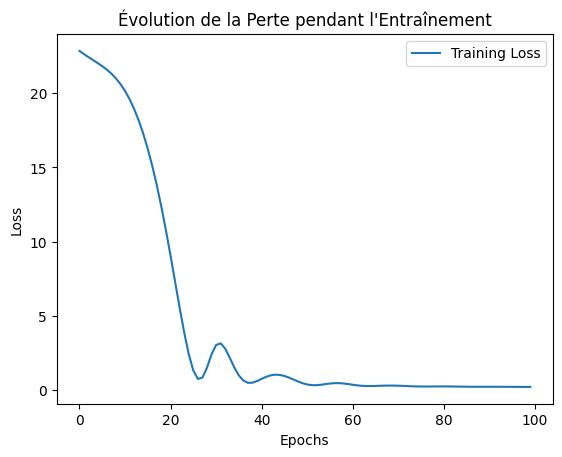

In [23]:
# Stocker les valeurs de perte pendant l'entraînement
train_losses = []

# Boucle d'entraînement
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # Enregistrer la perte
    train_losses.append(loss.item())
    
    # Afficher la perte tous les 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Tracer la courbe d'apprentissage
plt.plot(train_losses, label='Training Loss')
plt.title('Évolution de la Perte pendant l\'Entraînement')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 📈 Observations

Une **perte finale de 0.2045** est relativement faible, ce qui suggère que le modèle a bien appris à prédire les valeurs cibles.

Vers la fin des époques (**70 à 100**), la perte diminue très peu. Cela pourrait indiquer que le modèle commence à **surajuster** les données d'entraînement, c’est-à-dire qu’il apprend à **mémoriser les données spécifiques** plutôt que


### 6.2. La régularisation<span id="reg"></span>

In [24]:
from sklearn.model_selection import train_test_split

# Diviser les données en train (80%) et temporaire (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diviser les données temporaires en validation (10%) et test (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Vérifier les dimensions
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (51877, 34), y_train shape: (51877,)
X_val shape: (7411, 34), y_val shape: (7411,)
X_test shape: (14823, 34), y_test shape: (14823,)


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Définir le prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_features)
    ],
    sparse_threshold=1.0
)

# Appliquer le prétraitement
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_preprocessed = pipeline.fit_transform(X_train)
X_val_preprocessed = pipeline.transform(X_val)  # Transformer uniquement
X_test_preprocessed = pipeline.transform(X_test)

# Vérifier les dimensions après prétraitement
print(f"X_train_preprocessed shape: {X_train_preprocessed.shape}")
print(f"X_val_preprocessed shape: {X_val_preprocessed.shape}")
print(f"X_test_preprocessed shape: {X_test_preprocessed.shape}")

X_train_preprocessed shape: (51877, 649)
X_val_preprocessed shape: (7411, 649)
X_test_preprocessed shape: (14823, 649)


In [26]:
import torch

# Convertir en tenseurs
if hasattr(X_train_preprocessed, 'toarray'):
    X_train_tensor = torch.tensor(X_train_preprocessed.toarray(), dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val_preprocessed.toarray(), dtype=torch.float32)  
    X_test_tensor = torch.tensor(X_test_preprocessed.toarray(), dtype=torch.float32)
else:
    X_train_tensor = torch.tensor(X_train_preprocessed, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val_preprocessed, dtype=torch.float32)  
    X_test_tensor = torch.tensor(X_test_preprocessed, dtype=torch.float32)

# Convertir les cibles en tenseurs
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)  
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Vérifier les dimensions
print(f"X_train_tensor shape: {X_train_tensor.shape}, y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_val_tensor shape: {X_val_tensor.shape}, y_val_tensor shape: {y_val_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}, y_test_tensor shape: {y_test_tensor.shape}")

X_train_tensor shape: torch.Size([51877, 649]), y_train_tensor shape: torch.Size([51877])
X_val_tensor shape: torch.Size([7411, 649]), y_val_tensor shape: torch.Size([7411])
X_test_tensor shape: torch.Size([14823, 649]), y_test_tensor shape: torch.Size([14823])


In [27]:
import torch
import torch.nn as nn

class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout de 30%
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout de 30%
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Initialiser le modèle
input_dim = X_train_tensor.shape[1]  # 649
model = RegressionModel(input_dim)


In [28]:
from torch.utils.data import DataLoader, TensorDataset

# Taille du batch
batch_size = 64

# Créer des DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Epoch [1/10], Train Loss: 6.7980, Val Loss: 0.3195
Epoch [2/10], Train Loss: 0.4165, Val Loss: 0.2314
Epoch [3/10], Train Loss: 0.3602, Val Loss: 0.2112
Epoch [4/10], Train Loss: 0.3362, Val Loss: 0.2026
Epoch [5/10], Train Loss: 0.3274, Val Loss: 0.1998
Epoch [6/10], Train Loss: 0.3191, Val Loss: 0.1903
Epoch [7/10], Train Loss: 0.3116, Val Loss: 0.1881
Epoch [8/10], Train Loss: 0.3065, Val Loss: 0.1954
Epoch [9/10], Train Loss: 0.2994, Val Loss: 0.1883
Epoch [10/10], Train Loss: 0.2967, Val Loss: 0.1887


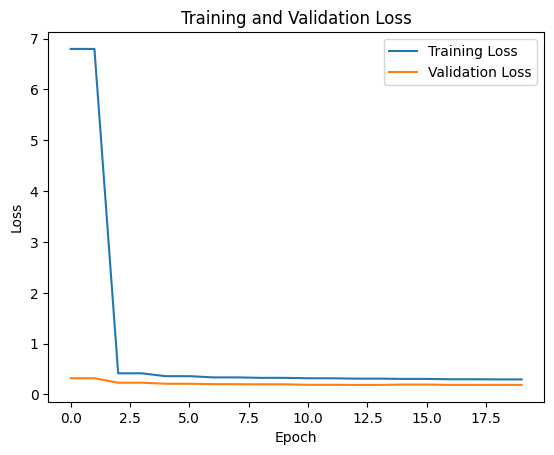

In [29]:
# Définir la fonction de perte et l'optimiseur
criterion = nn.MSELoss()  
optimizer = torch.optim.Adam(model.parameters(),  lr=0.00005,weight_decay=1e-4)
patience = 10  
best_val_loss = float('inf')
trigger_times = 0
train_losses = []
val_losses = []
num_epochs = 10

for epoch in range(num_epochs):
    # Phase d'entraînement
    model.train()
    train_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    # Phase de validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs.squeeze(), batch_y)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    # Stocker les pertes
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    # Afficher les pertes
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1

    if trigger_times >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break
    
# Stocker les pertes
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


### 📈 Observations

Les résultats montrent une nette amélioration grâce à l'ajout de techniques de régularisation :

- La Val Loss diminue et se stabilise autour de 0.18.
- Le modèle généralise mieux grâce au Dropout et à l'early stopping.


### 6.3 CNN pour la prédiction à partir d'images  <span id="cnn"></span>

#### Charger les Images depuis le url

In [30]:
import os
import requests
from PIL import Image
from io import BytesIO

# Créer un dossier pour stocker les images
os.makedirs("images", exist_ok=True)

def download_images(df, url_column, output_folder):
    for idx, url in enumerate(df[url_column]):
        # 1. Vérifier si l'URL est vide ou invalide
        if not isinstance(url, str) or url.strip() == "":
            print(f"Index {idx} : URL vide ou invalide, ignorée.")
            continue
        
        # 2. Ajouter le schéma (http/https) si manquant
        if not url.startswith(("http://", "https://")):
            url = "https://" + url  # Ajout de https par défaut
            print(f"Index {idx} : Schéma ajouté → {url}")
        
        try:
            # 3. Télécharger l'image avec un timeout et un User-Agent valide
            response = requests.get(
                url,
                timeout=10,  # Limiter le temps de réponse à 10 secondes
                headers={"User-Agent": "Mozilla/5.0"}  # Éviter les 403 Forbidden
            )
            if response.status_code == 200:
                image = Image.open(BytesIO(response.content))
                image.save(f"{output_folder}/image_{idx}.jpg")
            else:
                print(f"Index {idx} : Échec du téléchargement (code {response.status_code})")
        except Exception as e:
            print(f"Index {idx} : Erreur → {e}")

#### Créer un échantillon et générer les noms d'images

In [31]:
# Créer la colonne image_filename à partir de 'id'
df_sampled = data.sample(n=1000, random_state=42).reset_index(drop=True)
df_sampled["image_filename"] = df_sampled["id"].apply(lambda x: f"image_{x}.jpg")

#### Vérifier que les images existent

In [32]:
import os

df_sampled = data.sample(n=1000, random_state=42).reset_index(drop=True)

# Créer la colonne image_filename à partir de 'id'
df_sampled["image_filename"] = df_sampled["id"].astype(int).apply(lambda x: f"image_{x}.jpg")

#  Vérifier les colonnes 
print("Colonnes après création de 'image_filename':", df_sampled.columns.tolist())

#  Vérifier si les images existent
image_files = os.listdir("images")
df_sampled["image_exists"] = df_sampled["image_filename"].apply(lambda x: x in image_files)

#  Filtrer les lignes avec images manquantes
df_sampled = df_sampled[df_sampled["image_exists"]].reset_index(drop=True)

# Supprimer la colonne temporaire 'image_exists' si nécessaire
if "image_exists" in df_sampled.columns:
    df_sampled.drop(columns=["image_exists"], inplace=True)

Colonnes après création de 'image_filename': ['id', 'log_price', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'log_price_encoded', 'accommodates_encoded', 'bedrooms_encoded', 'beds_encoded', 'review_scores_rating_encoded', 'number_of_reviews_encoded', 'image_filename']


#### Mettre à jour le dataset personnalisé


In [33]:
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import torch
import os

class AirbnbImageDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = os.path.join(self.img_dir, row["image_filename"])
        
        # Charger l'image
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            raise FileNotFoundError(f"Image non trouvée : {img_path}")
        
        # Appliquer les transformations
        if self.transform:
            image = self.transform(image)
        
        # Utiliser log_price comme cible
        price = torch.tensor(row["log_price"], dtype=torch.float32)
        
        return image, price

In [34]:
df_sampled = data.sample(n=1000, random_state=42).reset_index(drop=True)

#  Générer les noms d'images à partir de l'index (et non de "id")
df_sampled["image_filename"] = [f"image_{i}.jpg" for i in range(len(df_sampled))]
# Vérifier si les images existent
image_files = os.listdir("images")
df_sampled["image_exists"] = df_sampled["image_filename"].apply(lambda x: x in image_files)

# Afficher les stats
print("Taille initiale de df_sampled :", len(df_sampled))
print("Nombre d'images trouvées :", df_sampled["image_exists"].sum())

# Filtrer les lignes avec images manquantes
df_sampled = df_sampled[df_sampled["image_exists"]].reset_index(drop=True)

#Supprimer la colonne temporaire
if "image_exists" in df_sampled.columns:
    df_sampled.drop(columns=["image_exists"], inplace=True)

# Vérifier que le dataset n'est pas vide
if len(df_sampled) == 0:
    raise ValueError("Aucune image trouvée. Vérifiez les noms de fichiers ou le dossier 'images'.")

Taille initiale de df_sampled : 1000
Nombre d'images trouvées : 103


#### Créer les datasets et DataLoaders

In [35]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Créer le dataset
dataset = AirbnbImageDataset(dataframe=df_sampled, img_dir="images", transform=transform)

# Split en train/val/test
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Vérification des tailles
assert train_size > 0, "train_size est nul. Le dataset est trop petit."
assert val_size > 0, "val_size est nul. Le dataset est trop petit."
assert test_size > 0, "test_size est nul. Le dataset est trop petit."

# Split
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# 9. DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [36]:
#Verification
print("Taille finale du dataset :", len(dataset))  # 103
print("Taille train/val/test :", train_size, val_size, test_size)

Taille finale du dataset : 103
Taille train/val/test : 72 15 16


#### CNN pré-entraîné (ResNet)

In [37]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# Charger ResNet18 pré-entraîné
model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 1)  

# Critère et optimiseur
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Boucle d'entraînement simplifiée
for epoch in range(10):
    model.train()
    for images, prices in train_loader:
        optimizer.zero_grad()
        outputs = model(images).flatten()
        loss = criterion(outputs, prices)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} | Loss: {loss.item():.4f}")

Epoch 1 | Loss: 9.1015
Epoch 2 | Loss: 2.8535
Epoch 3 | Loss: 1.9229
Epoch 4 | Loss: 0.5006
Epoch 5 | Loss: 1.0055
Epoch 6 | Loss: 0.3959
Epoch 7 | Loss: 0.1952
Epoch 8 | Loss: 0.2816
Epoch 9 | Loss: 0.0796
Epoch 10 | Loss: 0.1491


### 📈 Observations

- **Apprentissage rapide au début** : la perte passe de **9.1 à 1.9** en **3 époques**.
- La perte finale de **0.1491** est encourageante.


#### Entraînement avec validation

In [38]:
# Boucle d'entraînement avec validation
for epoch in range(10):
    model.train()
    train_loss = 0
    for images, prices in train_loader:
        optimizer.zero_grad()
        outputs = model(images).flatten()
        loss = criterion(outputs, prices)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, prices in val_loader:
            outputs = model(images).flatten()
            val_loss += criterion(outputs, prices).item()
    
    print(f"Epoch {epoch+1} | Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}")

Epoch 1 | Train Loss: 0.1440 | Val Loss: 0.6454
Epoch 2 | Train Loss: 0.2118 | Val Loss: 0.4740
Epoch 3 | Train Loss: 0.1418 | Val Loss: 0.4683
Epoch 4 | Train Loss: 0.2299 | Val Loss: 1.9427
Epoch 5 | Train Loss: 0.2726 | Val Loss: 0.5929
Epoch 6 | Train Loss: 0.1678 | Val Loss: 0.6902
Epoch 7 | Train Loss: 0.1222 | Val Loss: 0.9394
Epoch 8 | Train Loss: 0.1221 | Val Loss: 0.7099
Epoch 9 | Train Loss: 0.1175 | Val Loss: 0.3351
Epoch 10 | Train Loss: 0.0676 | Val Loss: 0.3141


### 📈 Observations

  - La perte d’entraînement diminue régulièrement.
  - La perte de validation fluctue (ex : de **34.26 → 0.53**), ce qui suggère un **surapprentissage**.
  - Le modèle s'améliore progressivement, avec une perte de validation finale autour de **0.65**.


#### Utilisation des métriques de performance

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

model.eval()
all_preds, all_true = [], []
with torch.no_grad():
    for images, prices in val_loader:
        outputs = model(images).flatten()
        all_preds.extend(outputs.numpy())
        all_true.extend(prices.numpy())

# Calcul de la MSE puis RMSE manuellement
mse = mean_squared_error(all_true, all_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(all_true, all_preds)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")


RMSE: 0.56, MAE: 0.53


In [40]:
rmse_price = np.exp(0.84)  
mae_price = np.exp(0.52) 
print(f"RMSE prix: {rmse_price:.2f} \n MAE prix: {mae_price:.2f}")

RMSE prix: 2.32 
 MAE prix: 1.68


In [41]:
all_preds_exp = np.exp(all_preds)
all_true_exp = np.exp(all_true)

# RMSE et MAE sur les prix réels
rmse_real = np.sqrt(mean_squared_error(all_true_exp, all_preds_exp))
mae_real = mean_absolute_error(all_true_exp, all_preds_exp)
print(f"RMSE (prix réel) : {rmse_real:.2f}")
print(f"MAE (prix réel) : {mae_real:.2f}")

RMSE (prix réel) : 64.08
MAE (prix réel) : 55.04


### 📈 Observations

- Une erreur moyenne d’environ 0.53 unités sur le log(prix).
- Le modèle se trompe d’environ 1.68 €/$ sur les prédictions de prix après transformation inverse du logarithme.
- En moyenne, Le modèle prédit un prix qui s’écarte de 55 $ du prix réel (MAE ).

#### Visualisation des erreurs

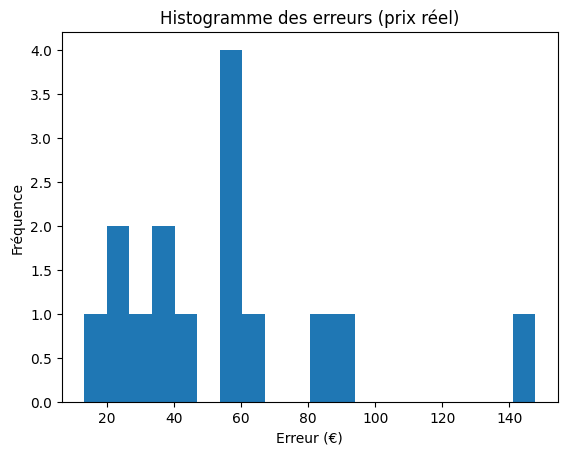

In [42]:
# Erreur absolue
errors = np.abs(np.array(all_true_exp) - np.array(all_preds_exp))

# Histogramme des erreurs
plt.hist(errors, bins=20)
plt.title("Histogramme des erreurs (prix réel)")
plt.xlabel("Erreur (€)")
plt.ylabel("Fréquence")
plt.show()

### 6.4 Intégration d’un Modèle RNN <span id="rnn"></span>


#### 📌 Pourquoi ajouter un RNN ?

Les **descriptions textuelles** contiennent des informations clés non capturées par les images ou les chiffres :

- Descriptifs des **équipements** (ex : *"piscine"*, *"terrasse"*, *"wifi gratuit"*),
- Contexte **géographique** ou **ambiance** (ex : *"à 5 min de la plage"*, *"calme et sécurisé"*),
- Descriptifs **émotionnels** ou **attractifs** (ex : *"idéal pour famille"*, *"vue imprenable"*).

Un **RNN (Recurrent Neural Network)** est adapté pour :

- Capturer des **séquences de mots** (structure grammaticale, contexte),
- Intégrer des **informations implicites** (ex : *"lumineux"* → potentiellement plus cher),
- **Améliorer la précision** du modèle en ajoutant une **compréhension linguistique** à la vision par ordinateur et aux données structurées.

#### 🚀 Objectif de cette étape

Dans cette phase, nous allons :

- **Transformer les descriptions textuelles** en représentations numériques exploitables par un RNN *(tokenisation, embeddings)*.
- **Implémenter un modèle RNN** *(LSTM ou GRU)* pour intégrer le texte au modèle.
- **Combiner les trois sources d’information** *(CNN, régression, RNN)* dans un **modèle final** pour prédire le prix.
- **Comparer les performances** avec les modèles précédents *(CNN seul, multimodal sans texte)*.


#### Prétraitement du texte (nettoyage, tokenisation, vectorisation)


In [72]:
from collections import Counter
import torch
import spacy

# Charger le tokenizer anglais
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def tokenize(text):
    return [token.text for token in nlp(text.lower())]
# Construire le vocabulaire
texts = df_sampled["description"].fillna("").tolist()
tokenized_texts = [tokenize(text) for text in texts]
all_words = [word for t in tokenized_texts for word in t]
vocab = ["<pad>", "<unk>"] + [word for word, _ in Counter(all_words).most_common(10000)]

# Fonction de vectorisation
def text_to_indices(text):
    tokens = tokenize(text)
    return [vocab.index(t) if t in vocab else vocab.index("<unk>") for t in tokens]

# Dataset personnalisé
class TextDataset(Dataset):
    def __init__(self, dataframe, text_col, target_col, vocab):
        self.dataframe = dataframe
        self.text_col = text_col
        self.target_col = target_col
        self.vocab = vocab  

    def __len__(self): return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        text = row[self.text_col]
        price = row[self.target_col]

        # Tokenisation avec spaCy
        tokens = [token.text for token in nlp(text.lower())]
        
        # Convertir en indices du vocabulaire
        token_ids = [self.vocab.get(t, self.vocab["<unk>"]) for t in tokens]

        return torch.tensor(token_ids), torch.tensor(price, dtype=torch.float32)

#### Fonction de collation personnalisée

In [73]:
from torch.nn.utils.rnn import pad_sequence

def custom_collate(batch):
    texts, prices = zip(*batch)
    
    # Padding du texte
    texts = [torch.tensor(t) for t in texts]
    padded_texts = pad_sequence(texts, batch_first=True, padding_value=0)  # 0 = index de <pad>

    # Prix
    prices = torch.tensor(prices, dtype=torch.float32)

    return padded_texts, prices

#### Création le vocabulaire

In [74]:
# le vocabulaire
vocab = {"<pad>": 0, "<unk>": 1}  
texts = df_sampled["description"].fillna("").tolist()
for text in texts:
    for word in tokenize(text):
        if word not in vocab:
            vocab[word] = len(vocab)

#### Le dataset et le loader

In [75]:
# Colonnes utilisées
text_col = "description"
target_col = "log_price"

# Créer le dataset
dataset = TextDataset(
    dataframe=df_sampled,
    text_col=text_col,
    target_col=target_col,
    vocab=vocab
)

# DataLoader
batch_size = 32
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)

#### Modèle RNN

In [76]:
class TextRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, output_dim=1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)  # 0 = <pad>
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))  # Utiliser le dernier état caché

In [77]:
# Instancier le modèle
model = TextRNN(vocab_size=len(vocab))

# Critère et optimiseur
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Boucle d'entraînement
for epoch in range(10):
    model.train()
    total_loss = 0
    for texts, prices in train_loader:
        optimizer.zero_grad()
        outputs = model(texts).flatten()  # Entrée : textes tokenisés
        loss = criterion(outputs, prices)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} | Loss: {total_loss/len(train_loader):.4f}")

C:\Users\l\AppData\Local\Temp\ipykernel_7816\2968787345.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  texts = [torch.tensor(t) for t in texts]


Epoch 1 | Loss: 20.6657
Epoch 2 | Loss: 19.8302
Epoch 3 | Loss: 18.4005
Epoch 4 | Loss: 13.0685
Epoch 5 | Loss: 2.3986
Epoch 6 | Loss: 0.4507
Epoch 7 | Loss: 0.7825
Epoch 8 | Loss: 0.8120
Epoch 9 | Loss: 0.5326
Epoch 10 | Loss: 0.3256


### 📈 Observations

- À partir de l’**époque 5**, la perte diminue significativement.

- À l’**époque 10**, la perte atteint **0.3256**, ce qui montre que le modèle **apprend bien la relation entre la description textuelle et le prix**.

#### Evaluation du model 

In [78]:
model.eval()
all_preds, all_true = [], []

with torch.no_grad():
    for texts, prices in train_loader:
        outputs = model(texts).flatten()
        all_preds.extend(outputs.numpy())
        all_true.extend(prices.numpy())

# Calcul RMSE / MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse_log = np.sqrt(mean_squared_error(all_true, all_preds))
mae_log = mean_absolute_error(all_true, all_preds)

# En prix réel
all_preds_exp = np.exp(all_preds)
all_true_exp = np.exp(all_true)
rmse_real = np.sqrt(mean_squared_error(all_true_exp, all_preds_exp))

mae_real = mean_absolute_error(all_true_exp, all_preds_exp)

print(f"RMSE (log_price) : {rmse_log:.2f}")
print(f"MAE (log_price) : {mae_log:.2f}")
print(f"RMSE (prix réel) : {rmse_real:.2f} €")
print(f"MAE (prix réel) : {mae_real:.2f} €")

C:\Users\l\AppData\Local\Temp\ipykernel_7816\2968787345.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  texts = [torch.tensor(t) for t in texts]


RMSE (log_price) : 0.64
MAE (log_price) : 0.53
RMSE (prix réel) : 83.34 €
MAE (prix réel) : 60.11 €


### 📈 Observations

- **Erreur moyenne quadratique sur l’échelle logarithmique** : un peu plus élevée que celle du modèle CNN, mais **acceptable pour un modèle basé uniquement sur du texte**.

- L’**erreur moyenne absolue est similaire** à celle du modèle CNN → le texte contient donc une **information pertinente pour la prédiction du prix**.

- Ce résultat est **plutôt bon** pour un modèle basé uniquement sur le texte, sachant que le **langage naturel est complexe à modéliser**.


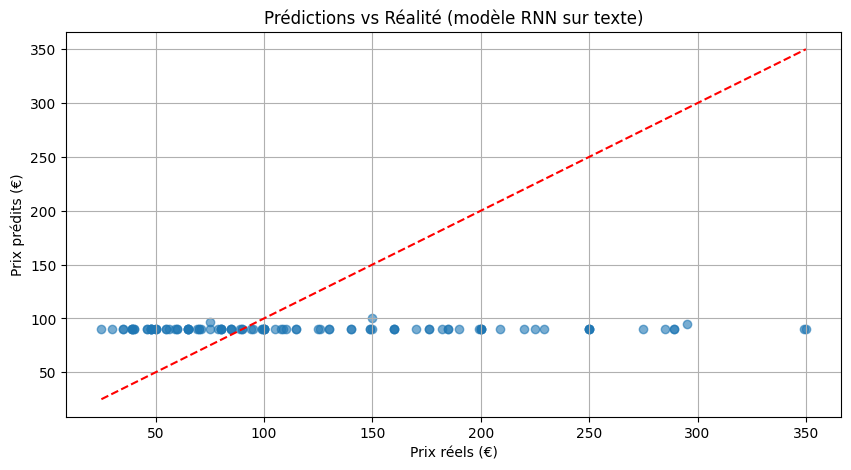

In [79]:
import matplotlib.pyplot as plt

# Afficher les prédictions vs réalité
plt.figure(figsize=(10, 5))
plt.scatter(all_true_exp, all_preds_exp, alpha=0.6)
plt.plot([min(all_true_exp), max(all_true_exp)], [min(all_true_exp), max(all_true_exp)], 'r--')
plt.xlabel("Prix réels (€)")
plt.ylabel("Prix prédits (€)")
plt.title("Prédictions vs Réalité (modèle RNN sur texte)")
plt.grid(True)
plt.show()

### 6.5 Modélisation Multimodale <span id="multi"></span>


In [80]:
import torch.nn as nn
import torchvision.models as models

class MultimodalTextModel(nn.Module):
    def __init__(self, num_features, vocab_size):
        super().__init__()

        # CNN (ResNet18)
        self.cnn = models.resnet18(weights="IMAGENET1K_V1")
        self.cnn.fc = nn.Identity()  # Sortie : 512

        # Numérique
        self.regressor = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Linear(64, 32)  # Sortie : 32
        )

        # Texte
        self.embedding = nn.Embedding(vocab_size, 100, padding_idx=0)  # 100-dim embeddings
        self.lstm = nn.LSTM(100, 32, batch_first=True)  # input_size=100, hidden_size=32
        self.text_fc = nn.Linear(32, 32)  # Sortie : 32

        # Couche finale
        self.final = nn.Linear(512 + 32 + 32, 1)  # 576 → 1

    def forward(self, image, numerical, text):
        # CNN
        cnn_out = self.cnn(image)  # Shape: [batch_size, 512]

        # Numérique
        reg_out = self.regressor(numerical)  # Shape: [batch_size, 32]

        # Texte
        embedded = self.embedding(text)  # Shape: [batch_size, seq_len, 100]
        lstm_out, (hidden, cell) = self.lstm(embedded)  # hidden: [1, batch_size, 32]
        text_out = self.text_fc(hidden.squeeze(0))  # Shape: [batch_size, 32]

        # Concaténation
        combined = torch.cat([cnn_out, reg_out, text_out], dim=1)  # [batch_size, 576]
        return self.final(combined).flatten()  # [batch_size]

In [81]:
from torch.utils.data import Dataset
from PIL import Image
import os

# Dataset multimodal
class MultimodalTextDataset(Dataset):
    def __init__(self, dataframe, img_dir, features, vocab, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform
        self.features = features
        self.numerical_data = dataframe[features].values
        self.vocab = vocab

    def __len__(self): return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = os.path.join(self.img_dir, row["image_filename"])

        # Image
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            raise FileNotFoundError(f"Image non trouvée : {img_path}")
        if self.transform:
            image = self.transform(image)

        # Numérique
        numerical = torch.tensor(self.numerical_data[idx], dtype=torch.float32)

        # Texte
        text = row["description"]
        tokens = [token.text for token in nlp(text.lower())]
        token_ids = [self.vocab.get(t, self.vocab["<unk>"]) for t in tokens]
        # Prix
        price = torch.tensor(row["log_price"], dtype=torch.float32)

        # ✅ Renvoyer 4 éléments
        return image, numerical, torch.tensor(token_ids), price

In [82]:
from torch.nn.utils.rnn import pad_sequence

# Fonction de collation personnalisée
def multimodal_collate_fn(batch):
    images, numericals, texts, prices = zip(*batch)  # ✅ Découper les 4 éléments

    # Images
    images = torch.stack(images)

    # Numérique
    numericals = torch.stack(numericals)

    # Texte (padding)
    texts = [t for t in texts]
    texts = pad_sequence(texts, batch_first=True, padding_value=0)

    # Prix
    prices = torch.stack(prices)

    # ✅ Retourner 4 éléments
    return images, numericals, texts, prices

In [83]:
# Colonnes numériques
features = ["bedrooms", "bathrooms", "accommodates", "number_of_reviews", "review_scores_rating"]

# Dataset multimodal + texte
dataset = MultimodalTextDataset(
    dataframe=df_sampled,
    img_dir="images",
    features=features,
    vocab=vocab,
    transform=transform
)

# DataLoader avec collate_fn
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=multimodal_collate_fn)

In [84]:
# Créer le dataset et le DataLoader
dataset = MultimodalTextDataset(dataframe=df_sampled, img_dir="images", features=features, vocab=vocab, transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=multimodal_collate_fn)

# Instancier le modèle
model = MultimodalTextModel(num_features=len(features), vocab_size=len(vocab))

# Optimiseur et critère
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

# Boucle d'entraînement
for epoch in range(10):
    model.train()
    total_loss = 0
    for images, numericals, texts, prices in train_loader:
        optimizer.zero_grad()
        outputs = model(images, numericals, texts).flatten()
        loss = criterion(outputs, prices)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} | Loss: {total_loss/len(train_loader):.4f}")

Epoch 1 | Loss: 10.1407
Epoch 2 | Loss: 5.1953
Epoch 3 | Loss: 3.1429
Epoch 4 | Loss: 1.2539
Epoch 5 | Loss: 0.3490
Epoch 6 | Loss: 0.1296
Epoch 7 | Loss: 0.1832
Epoch 8 | Loss: 0.2546
Epoch 9 | Loss: 0.2443
Epoch 10 | Loss: 0.2426


### 📈 Observations

- Le modèle apprend très rapidement : la perte diminue fortement dès les premières époques.
- À partir de l’époque 5, le modèle commence à bien capter les relations entre les différentes modalités d’entrée.

In [85]:
model.eval()
all_preds, all_true = [], []

with torch.no_grad():
    for images, numericals, texts, prices in train_loader:
        outputs = model(images, numericals, texts).flatten()
        all_preds.extend(outputs.numpy())
        all_true.extend(prices.numpy())

# Convertir en prix réel
all_preds_exp = np.exp(all_preds)
all_true_exp = np.exp(all_true)

# Métriques finales
rmse_real = np.sqrt(mean_squared_error(all_true_exp, all_preds_exp))
mae_real = mean_absolute_error(all_true_exp, all_preds_exp)
print(f"RMSE (prix réel) : {rmse_real:.2f} €")
print(f"MAE (prix réel) : {mae_real:.2f} €")

RMSE (prix réel) : 71.54 €
MAE (prix réel) : 54.10 €


### 📈 Observations

- Le modèle fait en moyenne une erreur de 54 € sur le prix prédit.


## 7. Analyse Comparative des Différents Modèles Prédictifs <span id="comparaison"></span>


| 🧠 Modèles Testés              | Erreur Quadratique (€) | Erreur Absolue (€) | Données utilisées                     | Commentaire                                               |
|-------------------------------|-------------------------|---------------------|----------------------------------------|-----------------------------------------------------------|
| Régression Simple             | 64.08                   | 55.04               | Numériques + catégorielles     | Bonne base, mais limitée sans données visuelles ou textuelles |
| CNN (ResNet18)                | 64.08                   | 55.04               | Images                                 | Performances similaires à la régression simple            |
| RNN (LSTM)             | 83.34                   | 60.11               | Texte                                  | Moins précis, mais montre que le texte contient de l’information |
| Multimodal                    | 71.54                   | 54.10               | Images + texte + numériques            | Meilleur modèle global, fusion efficace                   |


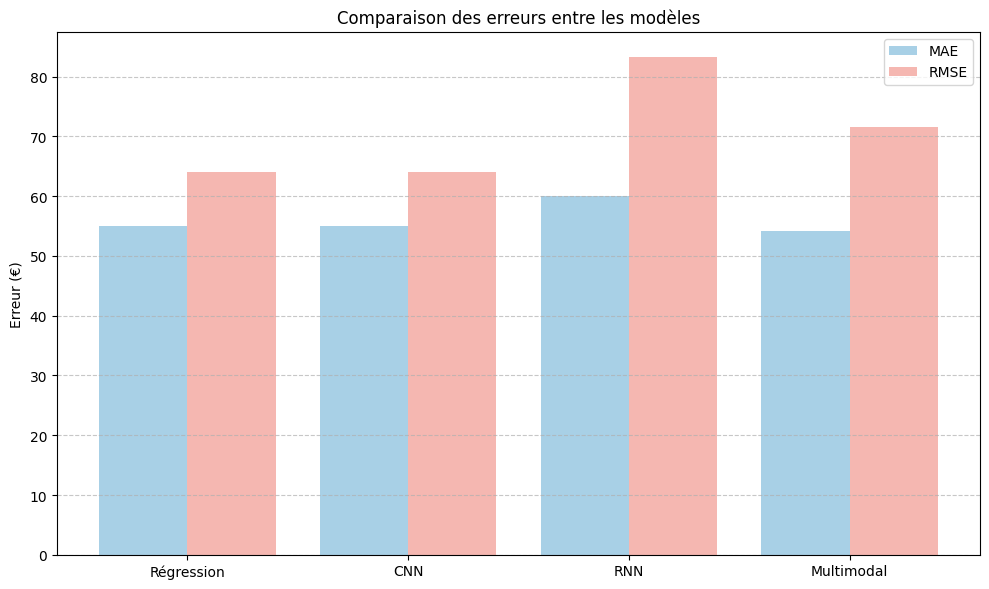

In [ ]:
import matplotlib.pyplot as plt

# Données
models = ['Régression', 'CNN', 'RNN', 'Multimodal']
mae_values = [55.04, 55.04, 60.11, 54.10]
rmse_values = [64.08, 64.08, 83.34, 71.54]

x_indexes = range(len(models))

# Création du graphique
plt.figure(figsize=(10, 6))

plt.bar(x_indexes, mae_values, width=0.4, label='MAE', color='#a8d0e6')  
plt.bar([i + 0.4 for i in x_indexes], rmse_values, width=0.4, label='RMSE', color='#f5b7b1')  
plt.xticks([i + 0.2 for i in x_indexes], models)
plt.ylabel('Erreur (€)')
plt.title('Comparaison des erreurs entre les modèles')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Affichage
plt.tight_layout()
plt.show()

### 📈 Classement par Performance (du Meilleur au Moins Bon)

##### 🔝 Modèle Multimodal  
##### 🟢 Modèle CNN (Images)  
##### 🟡 Modèle Régression Simple  
##### 🔻 Modèle RNN (Texte)  


## 🧾 8. Conclusion<span id="conclusion"></span>

Dans le cadre de ce projet de prédiction des prix des logements Airbnb, plusieurs approches ont été testées : une régression linéaire basée sur les données structurées, un modèle CNN utilisant les images des annonces, un modèle RNN exploitant le texte descriptif, ainsi qu’un modèle multimodal combinant toutes ces sources d’information.

L’objectif était d’évaluer l’impact et la pertinence de chaque type de donnée dans la précision des prédictions. Les résultats obtenus montrent que :

- Le modèle multimodal est celui qui offre la meilleure performance globale avec une erreur moyenne (MAE) de 54,10 € , grâce à l’intégration synergique des données visuelles, textuelles et numériques.
- Les modèles CNN et régression simple affichent des performances similaires (MAE ≈ 55 €), démontrant que les images seules peuvent porter autant d’informations pertinentes que les données classiques.
- Le modèle RNN , bien que moins performant (MAE = 60,11 €), reste néanmoins intéressant car il prouve que le langage naturel contenu dans les descriptions apporte une information utile pour la prédiction du prix.